In [1]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [2]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Memeriksa missing values
print("DataFrame dengan missing values:")
print(df)

# Menghitung jumlah missing values di setiap kolom
missing_values_per_column = df.isnull().sum()
print("\nJumlah missing values di setiap kolom:")
print(missing_values_per_column)

# Menghitung jumlah total missing values dalam DataFrame
total_missing_values = df.isnull().sum().sum()
print("\nJumlah total missing values dalam DataFrame:")
print(total_missing_values)

# Menampilkan baris-baris yang memiliki missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]
print("\nBaris dengan missing values:")
print(rows_with_missing_values)

# Menampilkan persentase missing values di setiap kolom
percentage_missing_values = (df.isnull().mean() * 100).round(2)
print("\nPersentase missing values di setiap kolom:")
print(percentage_missing_values)

DataFrame dengan missing values:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   

In [4]:
# Memeriksa baris duplikat (mengembalikan boolean)
duplikat = df.duplicated()
print("\nBaris duplikat (boolean):")
print(duplikat)

# Menampilkan baris yang duplikat
baris_duplikat = df[df.duplicated()]
print("\nBaris yang duplikat:")
print(baris_duplikat)

# Menghitung jumlah baris duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"\nJumlah total baris duplikat: {jumlah_duplikat}")

# Menghapus baris duplikat dan mempertahankan baris pertama yang muncul
df_dropped_duplicates = df.drop_duplicates()

print("\nDataFrame setelah menghapus baris duplikat (pertahankan yang pertama):")
print(df_dropped_duplicates)

# Menghapus baris duplikat dan mempertahankan baris terakhir yang muncul
df_dropped_duplicates_last = df.drop_duplicates(keep='last')

print("\nDataFrame setelah menghapus baris duplikat (pertahankan yang terakhir):")
print(df_dropped_duplicates_last)


Baris duplikat (boolean):
0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

Baris yang duplikat:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

Jumlah total baris duplikat: 0

DataFrame setelah menghapus baris duplikat (pertahankan yang pertama):
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10   

In [5]:
# Memeriksa distribusi kelas
class_distribution = df['Outcome'].value_counts()
print("Distribusi kelas:")
print(class_distribution)

# Menampilkan persentase distribusi kelas
class_distribution_percentage = df['Outcome'].value_counts(normalize=True) * 100
print("\nPersentase distribusi kelas:")
print(class_distribution_percentage)

Distribusi kelas:
Outcome
0    500
1    268
Name: count, dtype: int64

Persentase distribusi kelas:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


KNN PEMODELAN

In [6]:
# Menentukan Variabel X (Fitur/Atribut) dan Variabel y (Kelas/Label)

X= df.iloc[:, :-1]
y= df.values[:, -1]

pd.DataFrame(y).head()

,0
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


In [7]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data training dan data testing
# Data untuk testing 25%, data untuk training 75%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
# Inisiasi Model

model = KNeighborsClassifier(n_neighbors=7)

# Training model dengan .fit()

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [9]:
# Prediksi pada data test

y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0.])

In [10]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 0.])

In [11]:
# Memeriksa antara hasil prediksi dan data aktual

df = pd.DataFrame({'Prediksi': y_pred, 'Aktual': y_test})
df

,Prediksi,Aktual
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
...,...,...
187,0.0,0.0
188,1.0,1.0
189,0.0,0.0
190,0.0,1.0


In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[90, 33],
       [28, 41]], dtype=int64)

In [13]:
# Evaluasi Kinerja
print(f"accuracy_score {accuracy_score(y_test, y_pred)}")
print(classification_report_imbalanced(y_test, y_pred))

accuracy_score 0.6822916666666666
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.76      0.73      0.59      0.75      0.66      0.44       123
        1.0       0.55      0.59      0.73      0.57      0.66      0.43        69

avg / total       0.69      0.68      0.64      0.68      0.66      0.44       192



Nilai K optimal untuk KNN adalah: 8
Akurasi tertinggi oleh nilai K optimal adalah: 0.7640


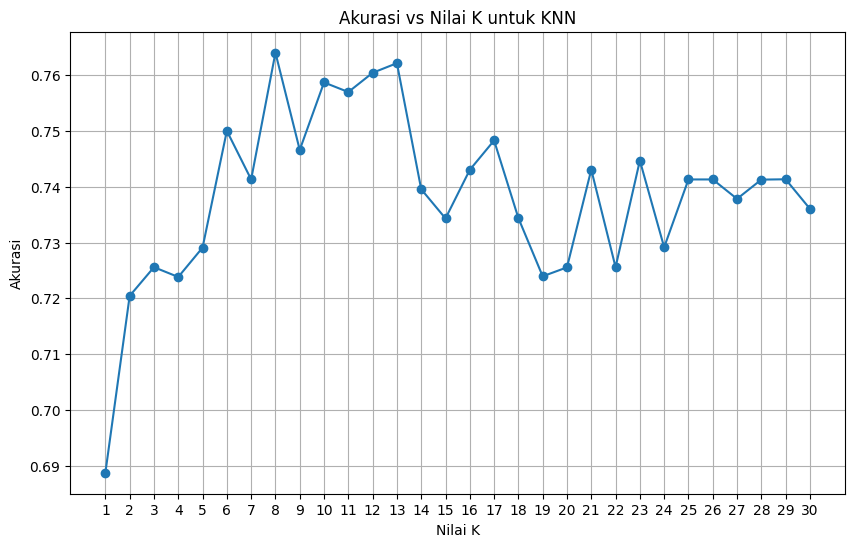

In [14]:
from sklearn.model_selection import cross_val_score

# Rentang nilai K yang akan diuji
k_range = range(1, 31)

# Menyimpan nilai rata-rata akurasi untuk setiap K
mean_scores = []

# Uji setiap nilai K menggunakan cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    mean_scores.append(scores.mean())

# Mencari nilai K dengan akurasi tertinggi
optimal_k = k_range[np.argmax(mean_scores)]
optimal_accuracy = max(mean_scores)

print(f"Nilai K optimal untuk KNN adalah: {optimal_k}")
print(f"Akurasi tertinggi oleh nilai K optimal adalah: {optimal_accuracy:.4f}")

# Membuat grafik akurasi vs K
plt.figure(figsize=(10, 6))
plt.plot(k_range, mean_scores, marker='o')
plt.title('Akurasi vs Nilai K untuk KNN')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.xticks(np.arange(1, 31, 1))
plt.grid(True)
plt.show()


In [15]:
# Save the model to a file
import pickle # Import the pickle module

filename = 'diabetes_model.sav'
pickle.dump(model, open(filename, 'wb'))

print(f"Model telah disimpan ke dalam file {filename}")

Model telah disimpan ke dalam file diabetes_model.sav


In [16]:
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
import imblearn
import pandas as pd

# Print version information
print(f"NumPy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Imbalanced-learn version: {imblearn.__version__}")
print(f"Pandas version: {pd.__version__}")


NumPy version: 1.24.3
Seaborn version: 0.12.2
Matplotlib version: 3.7.1
Scikit-learn version: 1.2.2
Imbalanced-learn version: 0.10.1
Pandas version: 2.0.3
